# Fine-grained containerized metadata interface

In [2]:
import ipywidgets as widgets
import networkx as nx
import matplotlib.pyplot as plt
from networkx_viewer import Viewer
import rglob
from ipyfilechooser import FileChooser
import sys
from ViewerApp import *
from interface_utils import read_json_file, create_graph, plot_graph, connect_graph
import pathlib

## Selection of metadata directory 
The user can select the directory with the metadata or single metadata file which is aimed to be analyzed 

In [3]:
# Create and display a FileChooser widget
fc = FileChooser('')
display(fc)

# Change defaults and reset the dialog
fc.default_path = str(pathlib.Path().resolve())
fc.reset()

# Change hidden files
fc.show_hidden = False

# Show or hide folder icons
fc.use_dir_icons = True

# Change the title (use '' to hide)
fc.title = '<b>Select the directory where the metadata is located</b>'

# Sample callback function
def change_title(chooser):
    chooser.title = '<b>Metadata files captured</b>'

# Register callback function
fc.register_callback(change_title)

FileChooser(path='/Users/polaya/Src_ContainerizedEnv/interface', filename='', title='', show_hidden=False, sel…

## Graph representation of the workflow based on the metadata
Once the metadata is selected, it is read and processed to build a graph where the nodes are the workflow components (data and application containers) and the edges are the execution paths og how the results were generated based on the record trail

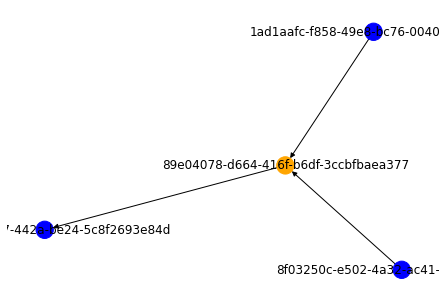

In [9]:
files = rglob.rglob(fc.selected_path, "*")
identification = 'UUID'
G, color_map=create_graph(files)
G=connect_graph(G)
plot_graph(G,color_map, identification)

## Interactive graph and metadata analysis
One the main graph is built, it is visualized through an interactive interface. The user can reorganize and see the attributes of each component to have an easier traceability and explainability of the workflow

In [10]:
#Visualize plot in the interactive interface
app = ViewerApp(G)
app.mainloop()